In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import h5py
import api as pyq 

/Users/ksu/Software/anaconda3/lib/python3.11/site-packages/pyscf/dft/libxc.py:771: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


In [2]:
# Wavefunction generation
from scf_runs import run_lda_he, run_casci
scf_checkfile, opt_checkfile, mf_lda = run_lda_he()
ci_checkfile, mc = run_casci(scf_checkfile, ncas=1, nroots=1)

/Users/ksu/Documents/GitHub/pyqmc/pyqmc/api.py
/Users/ksu/Software/anaconda3/lib/python3.11/site-packages/pyscf/__init__.py
He atom neutral LDA spin=0
HF
converged SCF energy = -2.85516047724274  <S^2> = 0  2S+1 = 1
LDA
converged SCF energy = -2.82670655418611  <S^2> = 4.4408921e-16  2S+1 = 1

WARN: Mulitple states found in CASCI solver. First state is used to compute the Fock matrix and natural orbitals in active space.

CASCI state   0  E = -2.88192509025559  E(CI) = -2.88192509025559  S^2 = 0.0000000
CASCI state   1  E = -1.40116327670131  E(CI) = -1.40116327670131  S^2 = 2.0000000
CASCI state   2  E = -0.951769234759041  E(CI) = -0.951769234759041  S^2 = 0.0000000
CASCI state   3  E = -0.384692858905305  E(CI) = -0.384692858905305  S^2 = 2.0000000
Available output from CASCI: <KeysViewHDF5 ['ci', 'fci', 'mo_coeff', 'ncas', 'nelecas']>


In [3]:
import importlib, recipes, linemin, sample_many
modules = [recipes, linemin, sample_many]
for m in modules:
    importlib.reload(m)


for fname in ['sj.hdf5']:
    if os.path.isfile(fname):
        os.remove(fname)
print("RUNNING VMC OPTIMIZATION")

recipes.OPTIMIZE(scf_checkfile, "sj.hdf5", 
                 ci_checkfile=ci_checkfile,
                 max_iterations=6, 
                 nconfig=1000, 
                 verbose=True,
                 # jastrow_kws={"ion_cusp":False}
                )

# Jastrow optimization results
df = recipes.read_opt("sj.hdf5")

# with h5py.File("sj.hdf5") as f:
#     print("keys", list(f.keys()))
#     print("wave function parameters", list(f['wf'].keys()))
#     ee_j = f['energy'][...]   
#     x = f['x'][...]
#     yfit = f['yfit'][...]
#     # pgrad = f['pgradient'][...]   
#     print(f['wf/wf2acoeff'][()])
#     print(f['wf/wf2bcoeff'][()])



RUNNING VMC OPTIMIZATION
starting warmup
finished warmup
----------vmc done
Gradient norm:  0.6369605232109811
Dot product between gradient and SR step:  0.9029812057319345
descent en -2.760618850460785 0.009310784200440587
energies from correlated sampling [-2.58740596 -2.76365205 -2.85682185 -2.88659376 -2.86959145]
----------vmc done
Gradient norm:  0.07228947460339252
Dot product between gradient and SR step:  0.9368484282019407
descent en -2.8949705095254763 0.005240649174473019
energies from correlated sampling [-2.86816248 -2.87131069 -2.87377913 -2.87554159 -2.87657136]
----------vmc done
Gradient norm:  0.01435900250438808
Dot product between gradient and SR step:  0.997040632076741
descent en -2.8942512594368357 0.005013439629297645
energies from correlated sampling [-2.89425866 -2.89464182 -2.89500339 -2.8953435  -2.89566229]
----------vmc done
Gradient norm:  0.01812546700398338
Dot product between gradient and SR step:  0.9079949318238137
descent en -2.8868886546190504 0.0

In [4]:
df

,energy,iteration,error,fname
0,-2.760619,0,0.009311,sj.hdf5
1,-2.894971,1,0.005241,sj.hdf5
2,-2.894251,2,0.005013,sj.hdf5
3,-2.886889,3,0.006839,sj.hdf5
4,-2.878423,4,0.005525,sj.hdf5
5,-2.889503,5,0.005067,sj.hdf5


In [5]:
import importlib 
import wftools, bosonrecipes, bosonaccumulators, bosonslater, linemin, accumulators, bosonwftools, mc, boson_stochastic_reconfiguration
modules = [bosonrecipes,wftools, bosonaccumulators, bosonslater, linemin, accumulators, bosonwftools, mc, boson_stochastic_reconfiguration]
for m in modules:
    importlib.reload(m)

# Boson Jastrow optimizationn
abvmc_file = 'abvmc-j-he_multi.hdf5'
for fname in [abvmc_file]:
    if os.path.isfile(fname):
        os.remove(fname)
print("RUNNING ABVMC OPTIMIZATION")

nblocks = 100
nsteps_per_block = 10
tstep=0.3
nconfig=1000
bosonrecipes.ABOPTIMIZE(scf_checkfile, 
                  abvmc_file, 
                  ci_checkfile=ci_checkfile,                        
                  max_iterations=6, 
                  verbose=True,  
                  # nblocks=nblocks, 
                  # nsteps_per_block=nsteps_per_block,
                  # tstep= tstep, 
                  nconfig=nconfig)
recipes.read_opt(abvmc_file)

RUNNING ABVMC OPTIMIZATION
Using spherical guess
starting warmup
finished warmup
----------vmc done
Gradient norm:  0.3946769289148343
Dot product between gradient and SR step:  0.8887205670565242
descent en -2.920884918528226 0.02432757730340921
energies from correlated sampling [-2.91828138 -2.88620122 -2.85824607 -2.83313716 -2.81025767]
----------vmc done
Gradient norm:  0.47417090900903536
Dot product between gradient and SR step:  0.8790020977673513
descent en -2.986399938857855 0.023447952977428854
energies from correlated sampling [-2.8594808  -2.87581702 -2.88449389 -2.88681062 -2.88414398]
----------vmc done
Gradient norm:  0.14680696514314462
Dot product between gradient and SR step:  0.911534128182712
descent en -2.936544788805021 0.00902918056707692
energies from correlated sampling [-2.95743957 -2.9526569  -2.94784988 -2.94302181 -2.93817949]
----------vmc done
Gradient norm:  0.20757517349396598
Dot product between gradient and SR step:  0.8957455681192987
descent en -2.

NameError: name 'recipes' is not defined

[MAC0132303:69329] tcp_peer_recv_connect_ack: invalid header type: 114
[MAC0132303:69329] tcp_peer_recv_connect_ack: invalid header type: 114
[MAC0132303:69329] tcp_peer_recv_connect_ack: invalid header type: 195
[MAC0132303:69329] tcp_peer_recv_connect_ack: invalid header type: 147
[MAC0132303:69329] tcp_peer_recv_connect_ack: invalid header type: 26
[MAC0132303:69329] tcp_peer_recv_connect_ack: invalid header type: 31
[MAC0132303:69329] tcp_peer_recv_connect_ack: invalid header type: 157
[MAC0132303:69329] tcp_peer_recv_connect_ack: invalid header type: 103
[MAC0132303:69329] tcp_peer_recv_connect_ack: invalid header type: 77
[MAC0132303:69329] tcp_peer_recv_connect_ack: invalid header type: 128
[MAC0132303:69329] tcp_peer_recv_connect_ack: invalid header type: 75
[MAC0132303:69329] tcp_peer_recv_connect_ack: invalid header type: 143
[MAC0132303:69329] tcp_peer_recv_connect_ack: invalid header type: 32
[MAC0132303:69329] tcp_peer_recv_connect_ack: invalid header type: 160
[MAC0132303

keys ['SRdot', 'configs', 'energy', 'energy_error', 'est_min', 'iteration', 'nconfig', 'pgrad', 'tau', 'wf', 'x', 'yfit']
wave function parameters ['wf2acoeff', 'wf2bcoeff']
[[[ 2.          2.        ]
  [ 0.14893217  0.14610908]
  [ 0.15130646  0.15192579]
  [-0.0301618  -0.02629778]
  [-0.26933521 -0.30016233]]]
[[-0.25       -0.5        -0.25      ]
 [ 0.          0.01467134  0.        ]
 [ 0.         -0.14961375  0.        ]
 [ 0.         -0.21648207  0.        ]]


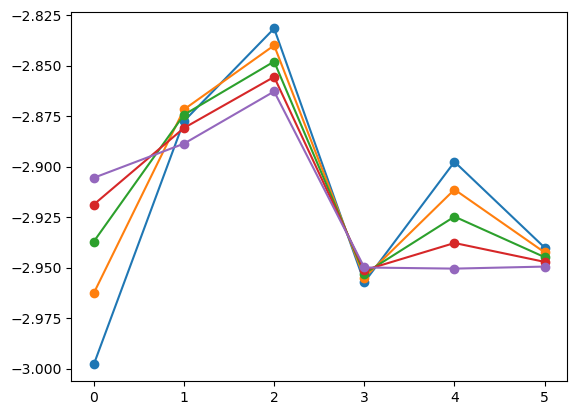

In [6]:
with h5py.File(abvmc_file) as f:
    print("keys", list(f.keys()))
    print("wave function parameters", list(f['wf'].keys()))
    ee_j = f['energy'][...]   
    x = f['x'][...]
    yfit = f['yfit'][...]
    # pgrad = f['pgradient'][...]   
    print(f['wf/wf2acoeff'][()])
    print(f['wf/wf2bcoeff'][()])

import matplotlib.pyplot as plt
plt.plot(yfit, marker='o', label="etot")


Text(0, 0.5, 'Partial gradients')

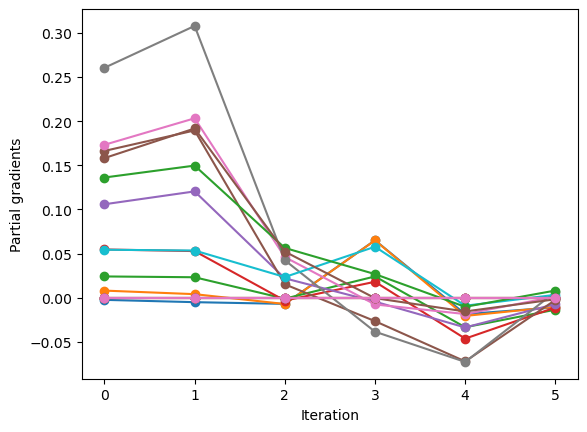

In [7]:
f = h5py.File(abvmc_file)
aa=f['pgrad'][...]
import matplotlib.pyplot as plt
plt.plot(aa, marker='o', label="etot")
plt.xlabel('Iteration')
plt.ylabel('Partial gradients')

In [175]:
# def get_variance(df, 
#                  discard = 10):
#     keys = df.keys()
#     numblocks = df[keys[0]].shape[0]
#     num_used_blocks = numblocks - discard
#     print('\t\t\t{:10s} {:6s} {:3s}'.format('Mean', 'Var', 'Ratio'))
#     for k in keys:
#         eb = df[k][discard:]
#         mean = np.mean(eb)
#         var = np.sqrt(1/(num_used_blocks - 1 ) * np.sum(eb**2 - mean**2))
#         print('{} \t {:.6f} \t {:.6f} {:.3f}'.format(k, mean, var, np.abs(var/mean)))

In [30]:
# get_variance(bosonrecipes.read_abvmc("bosonvmc.hdf5"),
#             discard=0)
# df2 = bosonrecipes.read_abvmc("bosonvmc.hdf5")
# df2
# plt.plot(df2['energytotal'], '-o', label='tot')
# # plt.plot(df2['energyei'], label='ei')
# # plt.plot(df2['energyee'], label='ee')
# # plt.plot(df2['energyke'], label='ke')
# # plt.plot(df2['energyvxc'], label='vxc')
# # plt.axhline(y=0, linestyle='dashed')
# plt.legend()

In [17]:
import importlib, recipes, bosonrecipes, bosonslater, bosonaccumulators, bosonwftools 
modules = [recipes, bosonrecipes, bosonrecipes, bosonslater, bosonaccumulators, bosonwftools] # Reloads recipes.py file after each update
for m in modules:
    importlib.reload(m)

# Boson Jastrow optimizationn
    
for fname in ['bosonsjnoi.hdf5']:
    if os.path.isfile(fname):
        os.remove(fname)
print("RUNNING ABVMC OPTIMIZATION NO ION CUSP")
wf, df = bosonrecipes.ABOPTIMIZE(scf_checkfile, "bosonsjnoi.hdf5", max_iterations=24, nconfig=1000, verbose=True,
                                jastrow_kws={"ion_cusp":False}
                                )

# Jastrow optimization results
dfnoi = pyq.read_opt("bosonsjnoi.hdf5")
dfnoi



RUNNING ABVMC OPTIMIZATION NO ION CUSP
Number of determinants in the bosonic wavefunction= 1
Using spherical guess
starting warmup
finished warmup
----------vmc done
Gradient norm:  0.1453199792541806
Dot product between gradient and SR step:  0.9784617716604322
descent en -2.8666383753081197 0.0013890246203200724
energies from correlated sampling [-2.79603046 -2.82335953 -2.84618373 -2.86489457 -2.87984999]
----------vmc done
Gradient norm:  0.04944151437772344
Dot product between gradient and SR step:  0.9877517491069976
descent en -2.8891615788326606 0.0016532874021162169
energies from correlated sampling [-2.87774984 -2.87969227 -2.88151087 -2.88320591 -2.88477768]
----------vmc done
Gradient norm:  0.031107552629770007
Dot product between gradient and SR step:  0.9888479405707269
descent en -2.889596875293664 0.001612251778042078
energies from correlated sampling [-2.87433707 -2.87568714 -2.87697399 -2.87819816 -2.87936013]
----------vmc done
Gradient norm:  0.02843026307168962
Do

,energy,iteration,error,fname
0,-2.866638,0,0.001389,bosonsjnoi.hdf5
1,-2.889162,1,0.001653,bosonsjnoi.hdf5
2,-2.889597,2,0.001612,bosonsjnoi.hdf5
3,-2.886646,3,0.001079,bosonsjnoi.hdf5
4,-2.889349,4,0.000861,bosonsjnoi.hdf5
5,-2.889454,5,0.001528,bosonsjnoi.hdf5
6,-2.891159,6,0.001383,bosonsjnoi.hdf5
7,-2.893427,7,0.000784,bosonsjnoi.hdf5
8,-2.890395,8,0.001207,bosonsjnoi.hdf5
9,-2.890467,9,0.001246,bosonsjnoi.hdf5


keys ['SRdot', 'configs', 'energy', 'energy_error', 'est_min', 'iteration', 'nconfig', 'pgrad', 'tau', 'wf', 'x', 'yfit']
wave function parameters ['wf2acoeff', 'wf2bcoeff']
[[[ 0.14807857  0.14986633]
  [ 0.22169254  0.22336089]
  [ 0.06112087  0.06198473]
  [-0.04934876 -0.04688615]]]
[[-0.25       -0.5        -0.25      ]
 [ 0.         -0.06997235  0.        ]
 [ 0.         -0.26191307  0.        ]
 [ 0.         -0.15962388  0.        ]]


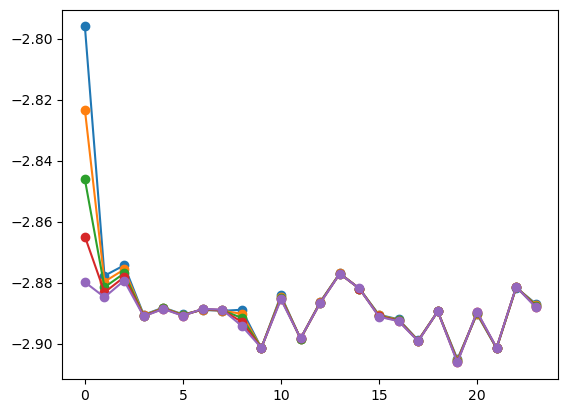

In [24]:
with h5py.File("bosonsjnoi.hdf5") as f:
    print("keys", list(f.keys()))
    print("wave function parameters", list(f['wf'].keys()))
    ee_j = f['energy'][...]   
    x = f['x'][...]
    yfit = f['yfit'][...]
    pgrad = f['pgrad'][...]   
    print(f['wf/wf2acoeff'][()])
    print(f['wf/wf2bcoeff'][()])

import matplotlib.pyplot as plt
plt.plot(yfit, marker='o', label="etot")


In [25]:
# f = h5py.File("bosonsjnoi.hdf5")
# aa=f['params'][...]
# import matplotlib.pyplot as plt
# plt.plot(aa, marker='o', label="etot")
# plt.xlabel('Iteration')
# plt.ylabel('Value of Jastrow parameters')